# Topic 40-41: Artificial Neural Networks

- 06/04/21
- onl01-dtsc-ft-022221

## Learning Objectives

- Start By Discussing Biological Neural Networks (powerpoint)
- Connect back to introduction from Canvas
- Demonstrate / play with Neural Network with Tensorflow Playground
- Walk through making neural networks with tensorflow/keras. 
- Learn how to evaluate neural networks.

- **Activity Part 1: Detecting Digits with Neural Networks**

- **Activity Part 2: Detecting Digits with Deep Networks**
- **Activity: Deeper Neural Networks Lab + Level Up**

## Questions/ Comments


- Is the math behind the logistic regression for neural networks in the introductory lesson different than what we learned for regular logistic regression? I.e. same matrix multiplication and functions for cost and loss? 
- How are the weights that each node in the layer applies assigned in the first place? Does each node have a separate weight parameter, and then the weights are tuned as it learns?


# Topic 40: Intro to Deep Learning

## Biological Neural Networks

<img src="Images/Brainbow-Hippocampus-rainbow-colors-large.jpg" width=60%>



> See `intro_to_bio_neural_networks_v2.pptx` for introduction to how biological neurons work. 


## Artificial Neural Networks 

    
- **The purpose of a neural network is to model $\hat y \approx y$ by minimizing loss/cost functions using gradient descent.**

- Neural networks are very good with unstructured data. (images, audio)

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-neural-networks-online-ds-ft-100719/master/images/new_first_network_num.png" width=80%>

- **Networks are comprised of sequential layers of neurons/nodes.**
    - Each neuron applies a **linear transformation** and an **activation function** and outputs its results to all neurons in the next layer.
    - Minimizing Loss functions by adjusting parameters (weights and bias) of each connection using gradient descent (forward and back propagation).



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">

- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
    
    
            
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >



- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
    
    
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples
    

### Activation Functions  *[ can return to later, if preferred]*

> The activation function introduced first in the curriculum is the sigmoid function. But there are many other options.

In [6]:
import os,sys
sys.path.append(os.path.abspath('../'))
from functions import *

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

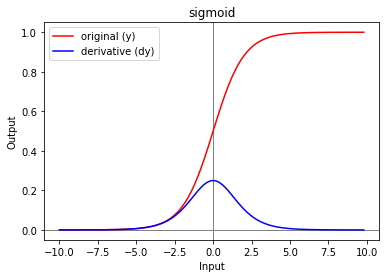

In [7]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

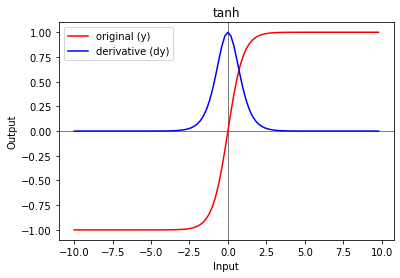

In [8]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

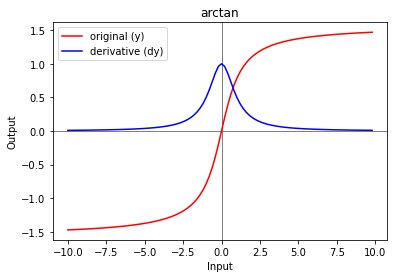

In [9]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

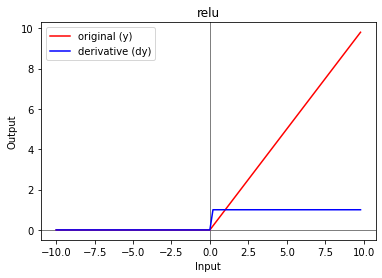

In [10]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

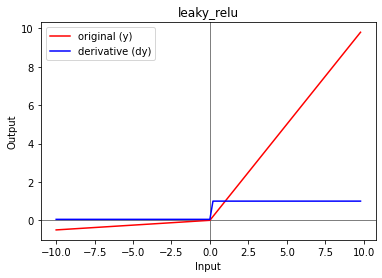

In [11]:
plot_activation(leaky_relu)

### How ANNs "Learn" 

- **Initialize the network with random starting weights and biases**


- **Input the first batch** of training data to get first predictions, calculate the model's error/cost, and use gradient descent to update the weights and biases for the next batch. 
    - **Forward propagation** is the calculating  loss and cost functions.

    - **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
        - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
        - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
- After updating the weights and biases, **repeat the process for each batch of data until the entire training dataset** has been used. 

- The process described above is **1 epoch**. An epoch is when the neural network has seen all batches of the training data. 
        
<!--         
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png"> -->

> ### Tensorflow Playground 
- Open the task linked below and visualize the intuition behind the processes described above. 

- [Tensorflow Playground Task](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70857&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

# Intro to Tensorflow/Keras


- Tensorflow Links
    - https://www.tensorflow.org/
    -https://www.tensorflow.org/api_docs/python/tf

> Keras Note: **Do not use the standalone keras package** nowadays, it is better to use the **keras submodule** in tensorflow 2.x


> **Note re Random Seeds:** Neural Networks have a LOT of randomized processed. Fixing the results of ANNs involves using tf.random.set_seed AND np.random.seed. 


In [12]:
# !pip install -U tensorflow
import tensorflow as tf
tf.random.set_seed(321)
from tensorflow import keras

print(tf.__version__)

import numpy as np
np.random.seed(123)

2.4.0


## Overview of Building a Neural Network with Keras


**Basics of Building a Neural Network with Keras:**
1. **Import required modules**
    - **For general neural network**
        - `from tensorflow.keras import models, layers,optimizers`
    - **For text:**
        - `from tensorflow.keras.preprocessing.text import Tokenizer`
        - `from tensorflow.keras.utils import to_categorical`
    - **For images:**
        - `from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img`
    - **For relocating image files:**
        - `import os, shutil`



2. **Decide on a network architecture (have only discussed sequential thus far)**
    - `model = models.Sequential()`



3. **Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.**
    - `model.add(layers.Dense(units, activation='relu', input_shape))`
    - `model.add(layers.Dense(units, activation='relu',input_shape))`
    - **3B. Final layer choice:**
        - Want to have as many neurons as classes you are trying to predict
        -  Final activation function:
            - For binary classificaiton, use `activation='sigmoid'`
            - For multi classificaiton, use `activation='softmax'`
        - For regression tasks, have a single final neuron.



4. **Compile the model:**
    - Specify optimiziers
        - `RMSprop`, `SGD`
    - specify loss functions
        - for binary classification: `'binary_crossentropy'`
        - for multi classification: `'categorical_crossentropy'`
    - specify metrics
        -usually 'acc'
    
    

5. **Training the model**
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
        - Note: if using images with ImageDataGenerator, use `model.fit_generator()`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        

6. **Evaluation / Predictions**
    - To get predicted results:
        - `y_hat_test = model.predict(test)`
    - To get evaluation metrics:
        - `results_test = model.evaluate(test, label_test)`
        

7. **Visualization**
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']` 
 

## **Activity Part 1: Detecting Digits with Shallow Neural Networks**

**Basics of Building a Neural Network with Keras:**
1. Import required modules
2. Decide on a network architecture (have only discussed sequential thus far)
3. Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.
4. Compile the model:
    - Specify optimiziers
    - specify loss functions
    - specify metrics

In [13]:
## Tensorflow imports
# !pip install -U tensorflow
import tensorflow as tf
tf.random.set_seed(321)
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,optimizers,activations,models
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.4.0


In [14]:
## Import the usual suspects (notice the mpl import)
import numpy as np
np.random.seed(123)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

# %matplotlib inline  

### Preparing images

Raw Tensor shape: (60000, 28, 28)
Single Image shape (28, 28)


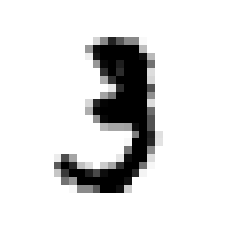

In [15]:
## Load in the mnist dataset from tensorflow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Single Image shape', train_images[0].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.axis('off')
plt.show()

In [16]:
len(train_images), len(test_images)

(60000, 10000)

#### Tensor Basics

- Tensors dimensions:
    - Scalars = 0D tensors
    - Vectors = 1D tensors
    - Matrices = 2D tensors
    - 3D tensors
- A tensor is defined by 3 characteristics:
    - rank or number of axes
    - the shape
    - the data type
- Tensor basics - properties (from [here](https://pgaleone.eu/tensorflow/2018/07/28/understanding-tensorflow-tensors-shape-static-dynamic/#tensors-the-basic)):
    - name
    - type:
        - tf.float32, tf.int64, tf.string
    - rank:
        - the number of dimension or the tensor. 
        - scalar = 0, vector = 1, etc.
    - shape:

#### Important Data Manipulations in numpy

- **Unrowing matrices:**
    - e.g. turning a matrix of 790 images, which are 64 x 64 pixels and in RBG (3 colors) a (790, 64, 64, 3) matrix  into a matrix with 1 row for each image a ( 64*64*3, 790) matrix
    - img_unrow = img.reshape(790, -1).T
        - reshape -1 essentially means "figure out how many, based upon the dat'
- **Increasing the rank:**
    - Vector with `np.shape()` returns  `(790,)`
    - `np.reshape(vector, (1, 790))`
- **Tensor indexling/slicing**
    - just as python, `tensor[start_idx : end_idx]`
    - left inclusive, right exclusive

In [23]:
## Reshape images as (num_images,-1)
train_images_unrow = train_images.reshape(len(train_images),-1)
test_images_unrow = test_images.reshape(len(test_images),-1)

## Scale data
train_images_unrow =  train_images_unrow/255.
test_images_unrow =  test_images_unrow/255.


In [24]:
## check train_img_unrow shape
train_images_unrow.shape

(60000, 784)

In [25]:
## check out an individual array's shape from train_img_unrow
train_images_unrow[0].shape

(784,)

### Preparing Targets

- This is a **Multiclass Classification** problem.
    - we need to One-Hot Encode our labels
    - `tensorflow.keras.utils.to_categorical`
    
- For multi classification:
    - good final activation function is softmax
    - categorical_crossenttropy


In [26]:
## Prepare y_train and y_train using to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
## Check the shape of y_train
y_train.shape

(60000, 10)

In [28]:
## check the first row of y_train
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### 5. Training the model
- `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`

- **batches:**
    - a set of N samples, processed independently in parallel
    - a batch determines how many samples are fed through before back-propagation. 
    - model only updates after a batch is complete.
    - ideally have as large of a batch as your hardware can handle without going out of memory.
        - larger batches usually run faster than smaller ones for evaluation/prediction. 
- **epoch:**
    - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
    - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
    - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

- **`history =  model.fit()` creates history object with .history attribute.**
    - `history.history()` returns a dictionary of metrics from each epoch. 
        - `history.history['loss']` and `history.history['acc']`



### Setting Network Architecture & Fitting Model

> Where tensor/matrix shapes will come back to haunt us!

In [29]:
## Print y_train shape
## Check the shape of y_train
n_classes = y_train.shape[1]
n_classes

10

In [31]:
## What is the shape of our individual images?
train_images_unrow[0].shape

(784,)

In [37]:
## Make a Sequential Model
model = models.Sequential()
## Hidden layer of 10 units with relu activation function
model.add(layers.Dense(16,activation='relu', input_shape=train_images_unrow[0].shape))

## Add final layer with n_classes # of neurons and activation='softmax'
model.add(layers.Dense(n_classes, activation='softmax'))

## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


#### Train-Test-Val Splits
- Starting with ANNs, we will want to have 3 splits for our data. 
    - Training Set: bulk/majority of the data (~70-80% of data)
    - Test Set: ~15-20% of data.
    - Validation Set: ~5-10% of data.
    
- **The training and test sets are used the same way** we used to with machine learning models.
    - Fit the model with the training data.
    - Evaluate the model's ability to generalize to new data withthe test split.
    
>- The Validation split is used to test for overfitting **during the training process**

- Note: in most situations we can have keras automatically take a portion fo the training data to use as validation data. 
`model.fit(X_train,y_train,validation_split=...`

In [38]:
# Fitting the model (10 epochs, batch size=64, validation_split=0.2)
history = model.fit(train_images_unrow,y_train,epochs=10,batch_size=64, 
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.9421 - accuracy: 0.7280 - val_loss: 0.2975 - val_accuracy: 0.9190
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3041 - accuracy: 0.9148 - val_loss: 0.2523 - val_accuracy: 0.9310
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.9254 - val_loss: 0.2359 - val_accuracy: 0.9333
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9326 - val_loss: 0.2179 - val_accuracy: 0.9400
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2111 - accuracy: 0.9409 - val_loss: 0.2034 - val_accuracy: 0.9446
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2036 - accuracy: 0.9415 - val_loss: 0.2005 - val_accuracy: 0.9453
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1834 - accuracy: 0.9470 - val_loss: 0.1895 - val_accuracy: 0.9477
Epoch 

In [42]:
## Make a dataframe out of history
res_df =pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy
0,0.558120,0.846229,0.297472,0.919000
1,0.292735,0.917646,0.252345,0.931000
2,0.254417,0.927625,0.235886,0.933250
3,0.230543,0.934042,0.217904,0.940000
4,0.211064,0.940375,0.203381,0.944583
5,0.196365,0.943833,0.200497,0.945333
6,0.183807,0.947625,0.189508,0.947750
7,0.173674,0.949396,0.189739,0.946667
8,0.165490,0.951875,0.182496,0.948583
9,0.158186,0.954333,0.180628,0.949583


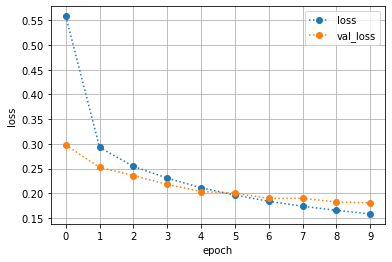

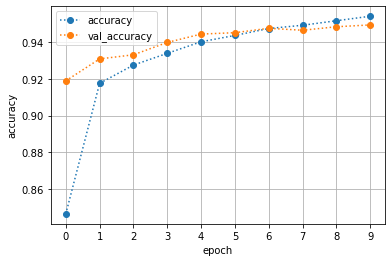

In [48]:
## Plot each type of metric on its own plot (accuracy/loss)
kws =dict(marker='o',ls=':')
## Plot Train/Val Losses
ax1= res_df[[col for col in res_df.columns if 'loss' in col]].plot(**kws)
ax1.set(xlabel="epoch",ylabel='loss')
## Plot Train/Val accuracy
ax2= res_df[[col for col in res_df.columns if 'acc' in col]].plot(**kws)
ax2.set(xlabel="epoch",ylabel='accuracy')



## Set the xticks to be 1 tick for each epoch  and add a grid
## Set the xticks to be 1 tick for each epoch  and add a grid
for ax in (ax1,ax2):
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.grid()


> **Q: What are we looking at? What should we check for?**

### Evaluating Neural Networks

In [50]:
## Use model.evalaute to get train and test accuracy
train_loss, train_acc  = model.evaluate(train_images_unrow,y_train)#score()
test_loss,test_acc = model.evaluate(test_images_unrow,y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

313/313 [==============================] - 0s 599us/step - loss: 0.1842 - accuracy: 0.9499
Training Accuracy: 0.955
Test Accuracy: 0.950


> To use sklearn's metrics functions, we will need to get predictions for our data, per usual.

In [51]:
## Get predictions for train and test
y_hat_test = model.predict(test_images_unrow)
y_hat_train = model.predict(train_images_unrow)

In [52]:
# Print Classification Report
print(metrics.classification_report(y_test,y_hat_test))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

> #### Ruh roh! What happened?

In [53]:
## Check y_test, and y_hat_test's shape
y_test.shape, y_hat_test.shape

((10000, 10), (10000, 10))

In [54]:
## What does one y-value look like?
y_hat_test[0]

array([1.5922700e-05, 4.3138085e-10, 7.2514736e-06, 2.6015746e-03,
       2.2034048e-09, 3.6078765e-07, 6.3805346e-12, 9.9735981e-01,
       7.3371439e-07, 1.4310319e-05], dtype=float32)

In [58]:
## What is one y-value's shape?
## What does one y-value look like?
y_hat_test[0]#.argmax()

array([1.5922700e-05, 4.3138085e-10, 7.2514736e-06, 2.6015746e-03,
       2.2034048e-09, 3.6078765e-07, 6.3805346e-12, 9.9735981e-01,
       7.3371439e-07, 1.4310319e-05], dtype=float32)

- Neural networks return the same # of values as the final layer of neurons. 
- we have 10 classes, one neuron for each of our classes (digits 0-9)
- since we used `softmax` as our final layer's activation function, we get **probabilities** of falling into **each of the 10 classes.**


- We want to use the class with the highest probability as our final prediction...

In [56]:
## Take the .argmax(axis=1) of the y-data
y_hat_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [59]:
## Make y_pred and y_true and y_test sklearn compatible
y_test_class =y_test.argmax(axis=1)
y_hat_test_class = y_hat_test.argmax(axis=1)

## Make y_pred and y_true and y_test sklearn compatible
y_train_class =y_train.argmax(axis=1)
y_hat_train_class = y_hat_train.argmax(axis=1)

In [61]:
# Print the classification report for trianing and test data
print("CLASSIFICATION REPORT -  TRAINING DATA")
print(metrics.classification_report(y_train_class,y_hat_train_class))
print('\n'*2)
print("CLASSIFICATION REPORT -  TEST DATA")
print(metrics.classification_report(y_test_class,y_hat_test_class))

CLASSIFICATION REPORT -  TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5923
           1       0.98      0.98      0.98      6742
           2       0.95      0.95      0.95      5958
           3       0.96      0.92      0.94      6131
           4       0.93      0.97      0.95      5842
           5       0.96      0.94      0.95      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.97      0.96      6265
           8       0.92      0.95      0.94      5851
           9       0.96      0.93      0.94      5949

    accuracy                           0.96     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.96      0.96      0.96     60000




CLASSIFICATION REPORT -  TEST DATA
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
 

[Text(69.0, 0.5, 'True Class'),
 Text(0.5, 117.59999999999997, 'Predicted Class')]

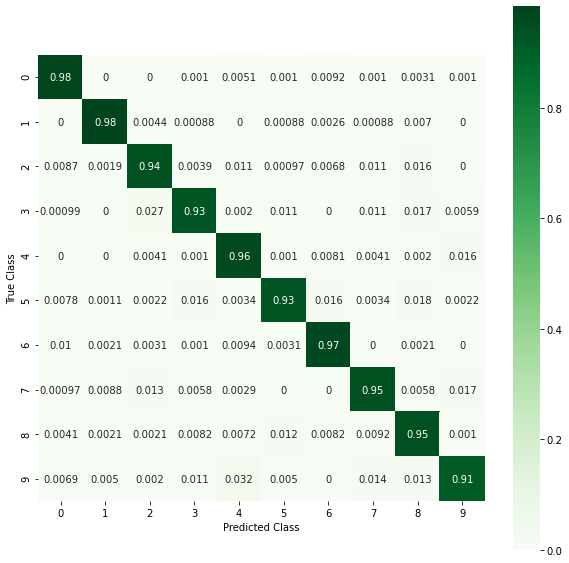

In [63]:
## Get the confusion matrix 
cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')
cm

## Plot the confusion Matrix
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
ax.set(ylabel='True Class',xlabel='Predicted Class')

### def `evaluate_network`:

> Combine all of the steps above into an evaluate netowrk function.

In [64]:
def evaluate_network(model, X_test,y_test,history=None,
                     X_train = None, y_train = None,
                     cmap='Greens', normalize='true',
                     classes=None,figsize=(10,4), 
                     metrics_list=['acc','loss']):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (Tensor/Array): y data
        history (History object): model history from .fit
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.
        classes (list, optional): List of class names for display. Defaults to None.
        figsize (tuple, optional): figure size Defaults to (8,4).
        
        X_train (Frame or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
    """
    
    header =  '==='*24
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')

        ## Make a dataframe out of history
        res_df = pd.DataFrame(history.history)#.plot()

        ## Plot Losses
        plot_kws = dict(marker='o',ls=':')
        
        ## Plot all metrics
        for metric in metrics_list:
            ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
            ax.set(xlabel='Epoch',ylabel=metric)
            ax.grid()
            ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
            plt.show()
           
        
    ## Evaluate Network for loss/acc scores
    try:
        print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
        if X_train is not None:
            train_loss, train_acc  = model.evaluate(X_train,y_train)#score()
     
        ## Get Test Accuracy
        test_loss,test_acc = model.evaluate(X_test,y_test)
        
        if X_train is not None:
            print(f"\tTraining Accuracy: {train_acc:.3f}")
        print(f"\tTest Accuracy: {test_acc:.3f}")
        print()
        
    except Exception as e:
        print("Error evaluating for accuracy:")
        print(e)
        
        

    
     ## Evaluate training data with sklearn
    if X_train is not None:
        
        ## Print report header, get preds, get class report, and conf matrix
        print(header,"\t[i] CLASSIFICATION REPORT - TRAINING DATA",
              header,sep='\n')
        y_hat_train = model.predict(X_train)
        y_train_class =y_train.argmax(axis=1)
        y_hat_train_class = y_hat_train.argmax(axis=1)
        print(metrics.classification_report(y_train_class,y_hat_train_class))
        print()
        cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                      normalize='true')

        ## Plot the confusion Matrix
        fig,ax = plt.subplots(figsize=(10,10))
        sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
        ax.set(ylabel='True Class',xlabel='Predicted Class',
               title='Confusion Matrix - Training Data')    
        plt.show()
        
        print('\n'*2)
        
    ## Test Data - Print report header, get preds, get class report, and conf matrix
    y_test_class =y_test.argmax(axis=1)
    y_hat_test = model.predict(X_test)
    y_hat_test_class = y_hat_test.argmax(axis=1)
    
    print(header,"\t[i] CLASSIFICATION REPORT -  TEST DATA",header,sep='\n')
    print(metrics.classification_report(y_test_class,y_hat_test_class))

     ## Get the confusion matrix 
    print()
    cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')
    ## Plot the confusion Matrix
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Test Data') 
    plt.show()

	[i] MODEL HISTORY


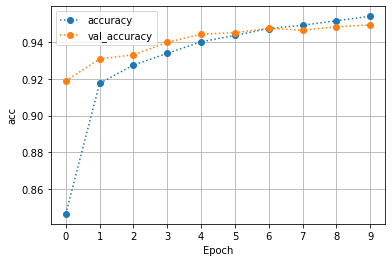

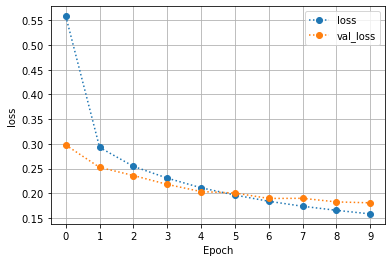

	[i] EVALUATING MODEL
313/313 [==============================] - 0s 738us/step - loss: 0.1842 - accuracy: 0.9499
	Training Accuracy: 0.955
	Test Accuracy: 0.950

	[i] CLASSIFICATION REPORT - TRAINING DATA
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5923
           1       0.98      0.98      0.98      6742
           2       0.95      0.95      0.95      5958
           3       0.96      0.92      0.94      6131
           4       0.93      0.97      0.95      5842
           5       0.96      0.94      0.95      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.97      0.96      6265
           8       0.92      0.95      0.94      5851
           9       0.96      0.93      0.94      5949

    accuracy                           0.96     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.96      0.96      0.96     60000




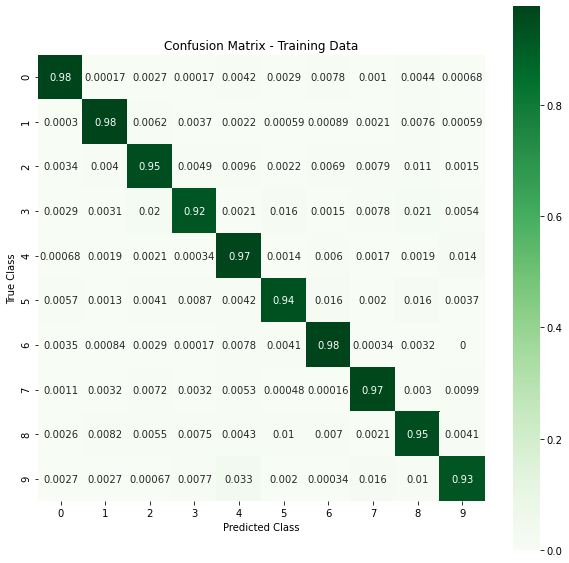




	[i] CLASSIFICATION REPORT -  TEST DATA
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.95      0.93      0.94      1010
           4       0.93      0.96      0.95       982
           5       0.96      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.92      0.95      0.93       974
           9       0.96      0.91      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




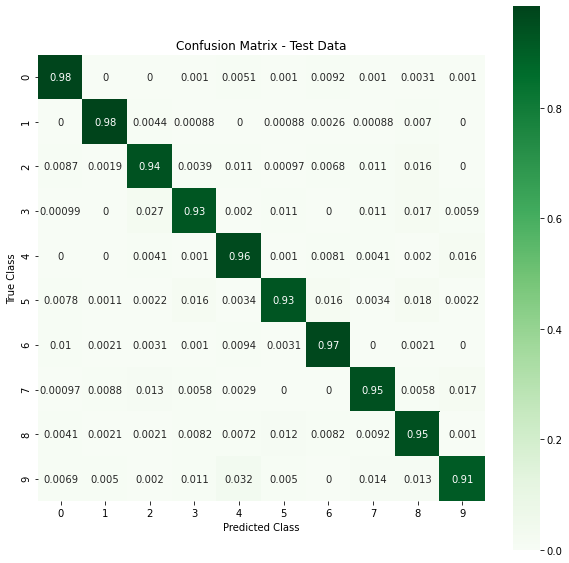

In [66]:
## Evaliuate our model with our function
evaluate_network(model, test_images_unrow,y_test,history=history,
                           X_train = train_images_unrow,y_train=y_train)

> Great! Now we have an easy way to compare our networks as we continue on to Deep Networks

# Topic 41:  Deeper Neural Networks

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-neural-networks-onl01-dtsc-ft-070620/master/images/Deeper_network.jpg">

## Intro to Deeper Networks

### What is a "deep" neural network?

- Any network with more than 1 hidden layer. 

### Why deeper networks?

- **Advantages:**
    - largely eliminates need for feature engineering
    - multiple levels of information processing in one networking.
        - Ex: for images:
            - First layer detects edges
            - second layer gorups edges and detects patterns
            - more layers group even bigger parts together
        - Ex: for audio:
            - first layer: low level wave features
            - second: basic units of sounds ("phonemes")
            - third: word recognition
            - fourth: sentence recognition
          
          
- **Disadvantages**:
    - Longer training time
    - Overfits very easily.
            
> #### Revisit [Tensorflow Playground with more complex task](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42037&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### How many layers/units?

- **Two schools of thought on how how many layers:**
    - Start with a single layer with few neurons
        - Add additional, add additional
    - Start with a fully fleshed out network that we then prune until we see a dropoff in in performance (then restore the last changes)

## **Activity Part 2: Detecting Digits with Deep Networks**

> Reat our modeling steps from above, but wrap it in a `make_deep_model` function and increase the number of layers and re-evaluate

In [69]:
def make_deep_model():
    ## Make a Sequential Model
    model = models.Sequential()
    ## Hidden layer of 10 units with relu activation function
    model.add(layers.Dense(32,activation='relu', input_shape=train_images_unrow[0].shape))
    model.add(layers.Dense(16,activation='relu'))#, input_shape=train_images_unrow[0].shape))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    ## Display model summary
    display(model.summary())
    return model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 0.9284 - accuracy: 0.7080 - val_loss: 0.2327 - val_accuracy: 0.9343
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2273 - accuracy: 0.9339 - val_loss: 0.1846 - val_accuracy: 0.9480
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1765 - accuracy: 0.9485 - val_loss: 0.1763 - val_accuracy: 0.9477
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1527 - accuracy: 0.9564 - val_loss: 0.1521 - val_accuracy: 0.9570
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1315 - accuracy: 0.9617 - val_loss: 0.1472 - val_accuracy: 0.9575
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1216 - accuracy: 0.9644 - val_loss: 0.1438 - val_accuracy: 0.9587
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.1318 - val_accuracy: 0.9626
Epoch 

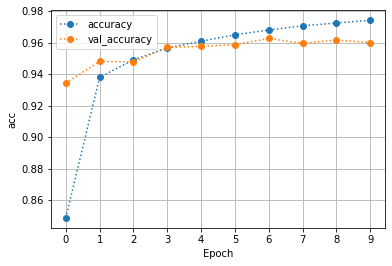

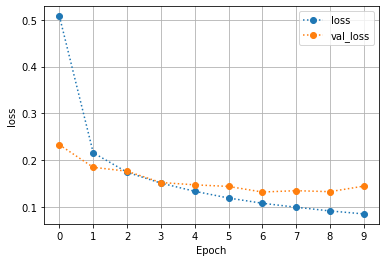

	[i] EVALUATING MODEL
313/313 [==============================] - 0s 726us/step - loss: 0.1456 - accuracy: 0.9588
	Training Accuracy: 0.972
	Test Accuracy: 0.959

	[i] CLASSIFICATION REPORT - TRAINING DATA
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5923
           1       0.99      0.98      0.99      6742
           2       0.95      0.98      0.97      5958
           3       0.97      0.95      0.96      6131
           4       0.97      0.98      0.98      5842
           5       0.99      0.93      0.96      5421
           6       0.97      0.99      0.98      5918
           7       0.98      0.97      0.97      6265
           8       0.93      0.98      0.96      5851
           9       0.98      0.95      0.97      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000




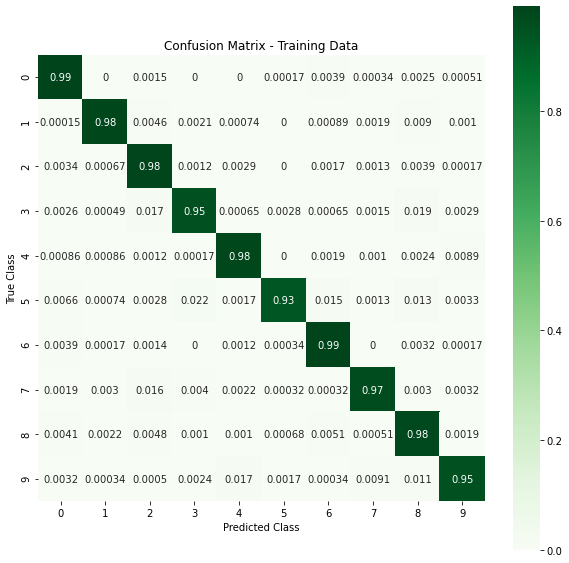




	[i] CLASSIFICATION REPORT -  TEST DATA
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.98      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.99      0.90      0.94       892
           6       0.95      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.93      0.97      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




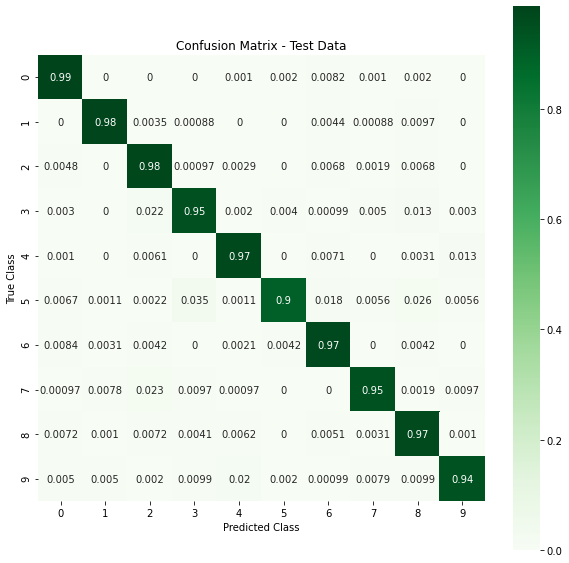

In [70]:
# Use our build function to make a deep model, fit it, and evaluate it with our func
deep_model =make_deep_model()
history = deep_model.fit(train_images_unrow,y_train,epochs=10,batch_size=64, 
                    validation_split=0.2)
## Evaliuate our model with our function
evaluate_network(deep_model, test_images_unrow,y_test,history=history,
                           X_train = train_images_unrow,y_train=y_train)

### Q: How did our deeper model do? What are we noticing? What to try next?

>#### Next Class: Tuning Neural Networks

## **Activity: Deeper Neural Networks Lab + Level Up**

> **Bonus Assignment for us: Add a final model where we use MinMaxScaler instead of StandardScaler and look for convergence.**
- `repo folder` > `Phase_4` >`topic_40-41_neural_networks` >`labs`>`dsc-deeper-neural-networks-lab-master`> `index_level_up-SG.ipynb`

# APPENDIX

#### A Note On Shapes

- Inputs:
    - $n$: Number of inputs (columns) in the feature vector 
    - $l$: Number of items (rows) in the training set 
    - $m$: Number of items (rows) in the test set
    
    
- Input X:
    - Will have shape $n$ x $l$ (number of features x number of training data points/rows)

## ANN Visualizer

- https://github.com/RedaOps/ann-visualizer
    - HAVE NOT TESTED FOR COMPATIBILITY WITH LEARN-ENV YET
    - requires graphviz

### Using the chain rule for updating parameters with sigmoid activation function example:
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >
- $\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$
 
 
- For each training sample $1,...,l$ you'll need to compute:

    - $ z^{(i)} = w^T x^ {(i)} +b $

    - $\hat y^{(i)} = \sigma (z^{(i)})$

    - $dz^{(i)} = \hat y^{(i)}- y^{(i)}$

- Then, you'll need to make update:

    - $J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$ (for the sigmoid function)

    - $dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

    - $dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

    - $db_{+1}^{(i)} =  dz^{(i)}$

    - $\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

- After that, update: 

    $w_1 := w_1 - \alpha dw_1$

    $w_2 := w_2 - \alpha dw_2$

    $b := b - \alpha db$

    repeat until convergence!
    
    